# A very brief introduction to Deep Reinforcement Learning

Consider an **agent** whose goal is to solve a given problem: finding its way through a maze, finding the best way to solve a logistics problem, learning how to play games (Atari or other digital games, or strategy games like Chess and Go), finding the 3d dimensional structure of proteins, or turning a Large Language Model from an incoherent and rude "blabbermouth" into a coherent an polite language generator.

In Reinforcement Learning (RL) such problems need to be solved by exploring a given environment: the agent is able to probe the environment by observing its states (that might only contain partial information) and by using a set of actions that (typically) change the state of the environment; moreover, the agent receives stimuli from the environment, in the form of rewards, that depend on the chosen action and state achieved.     

To simplify things, let's only consider the case where there is only a finite **observation space**, i.e., a finite set of states

$${\cal S} = \{s_1,\ldots,s_N\}\;,$$

and a finite set of actions, independent of the state,

$${\cal A}=\{a_1,\ldots,a_M\}\;.$$

We will also assume that by taking action $a_i$ in state $s_j$ the agent gets a reward

$$R(a_i,s_j) \in \mathbb{R}\;.$$

Each agent acts according to a **policy**, that corresponds to a choice of action given the observed state

$$\pi: {\cal S}\rightarrow {\cal A}\;.$$

We will consider discrete time, finite horizon games, i.e., games where the actions are taken in separate moments in time and finish at time $T\in \mathbb{Z}^+$. In such a case we can take the sequence of moments to be $\{0,1,\ldots,T\}$, and given a policy $\pi$ the agent will receive a sequence of rewards $\{R_{\pi}(0),\ldots, R_{\pi}(T)\}$ with a combined **discounted return** of

$$G_{\pi} = R_{\pi}(0)+ \gamma R_{\pi}(1) + \gamma^2 R_{\pi}(2) + \cdots + \gamma^T R_{\pi}(T) = \sum_{t=0}^{T} \gamma^t R_{\pi}(t)\;,$$

where we have included a discount factor $0<\gamma \leq 1$. If $\gamma < 1$, the goal of the discount factor is to make future rewards less relevant to the agent's decisions at times $t< T$.   

Naturally, the goal of the agent is to find an optimal policy $\pi^*$, i.e., a policy that maximizes the return

$$G_{\pi^*} = \max_{\pi} G_{\pi}\,.$$

This setting can be generalized to a stochastic context, where taking a given action does not lead to a determined (next) state but instead gives rise to a probability distribution over the states. In such a case, the rewards become random variables, and the return is then given by an expectation value. To simplify our presentation, we'll not formalize this important generalization.





We'll now explore some of the previous concepts in Gymnasium "An API standard for reinforcement learning with a diverse collection of reference environments"
https://gymnasium.farama.org/index.html

To start let's consider Frozen Lake https://gymnasium.farama.org/environments/toy_text/frozen_lake/

In [ ]:
import gymnasium as gym

ENV_NAME = "FrozenLake-v1"
env = gym.make(ENV_NAME, is_slippery=False)

In this case the observation space has 16 states coded by a disctinct integer.

In [ ]:
env.observation_space

Discrete(16)

There are 4 actions,

    0: Move left

    1: Move down

    2: Move right

    3: Move up


In [ ]:
env.action_space

Discrete(4)

In [ ]:
# generate a random action
env.action_space.sample()

np.int64(1)

In this case, when we reset the environment we always start in the "first" position. in other cases the envoronment can reset at different states.

In [ ]:
obs,_ = env.reset()
obs

0

Taking an action results in a new-state, a reward and information concerning if we reached the end of the game, either because we've achieved and end state or reached a maximum number of allowed steps.  

In [ ]:
action = 3
new_state, reward, is_done, is_trunc, _ = env.step(action)
print(new_state, reward, is_done, is_trunc)

5 0.0 True False


Let's create agents that play randomly and collect the corresponding rewards.  

In [ ]:
class Agent_Random:
    def __init__(self):
        self.total_reward = 0.0

    def step(self, env):
        action = env.action_space.sample()
        new_state, reward, is_done, is_trunc, _ = env.step(action)
        self.total_reward += reward
        return  new_state, reward, is_done, is_trunc

In [ ]:
ENV_NAME = "FrozenLake-v1"
env = gym.make(ENV_NAME)

agent = Agent_Random()

env.reset()
done = False

while not done:
  new_state, reward, is_done, is_trunc  = agent.step(env)
  print(new_state, reward, is_done, is_trunc)
  done = is_done or is_trunc

agent.total_reward

0 0.0 False False
4 0.0 False False
5 0.0 True False


0.0

We'll now visualize our agent in action

In [ ]:
import gymnasium as gym
import imageio

env = gym.make(ENV_NAME, render_mode="rgb_array", is_slippery=False)
obs, _ = env.reset(seed=0)
done = False
frames = []

while not done:
    frames.append(env.render())
    new_state, reward, is_done, is_trunc  = agent.step(env)
    print(new_state, reward, is_done, is_trunc)
    done =  is_done or is_trunc
frames.append(env.render())

env.close()

# Save to video
imageio.mimsave("pong_video.mp4", frames, fps=5)

# Show video
from IPython.display import HTML
from base64 import b64encode

mp4 = open("pong_video.mp4", 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=400 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")

0 0.0 False False
0 0.0 False False
4 0.0 False False
8 0.0 False False
8 0.0 False False
4 0.0 False False
5 0.0 True False


**Exercise**: Build a class whose agents always choose to go left. And another whose agents choose left 50% of the time and right the other 50%.

**Exercise**: Change the environment to "Taxi-v3".

To see how an agent can learn an optimal policy, we will very briefly recall the idea of **value function** and the fundamental result captured by **Bellman's equation**.

Given a discount factor $\gamma\in]0,1]$ and a policy
$\pi:{\cal S}\rightarrow {\cal A}$, we define the associated (state-action) value function to be the function

$$Q_{\pi}:{\cal S}\times{\cal A}\rightarrow \mathbb{R}$$

such that $Q_{\pi}(s,a)$ *equals the (expected) discounted reward obtained by choosing action $a$ at state $s$ and then following policy $\pi$ until the end of the game*.

Now consider the value function $Q = Q_{\pi^*}$ associated with an optimal policy $\pi^*$. A fundamental mathematical result underlying important achievements in RL is the fact that (the optimal) $Q$ is a solution of Bellman's equation

$$ Q(s,a) = R(s,a) + \max_{a'\in {\cal A}} Q(s',a') \;, $$

where $s'$ is the state reached from state $s$, by taking action $a$. Once again, we are simplifying the presentation by only considering the deterministic setup.

# Q - tabular learning

We'll now describe an implementation of the Q-tabular learning algorithm, following the presentation in Chapter 5 of Lapan's "Deep Reinforcement Learning Hands On - Third Edition".


1. The idea for this algorithm is to construct a double entry table for the $Q$ values (we'll use a dictionary with keys (state,action) and values equal to the Q-values).  

2. In the beginning, our values dictionary is empty because our agent doesn't know anything about the environment.

3. To learn about the environment, in each step, the agent performs a random action and records the corresponding transition information in a tuple $(s,a,r,s')=$(state, action, reward, new_state).

4. Then it updates the $Q$ value using this new information, by using the rule

$$Q(s,a) \leftarrow (1-\alpha)Q(s,a) + \alpha (r + \gamma\max_{a'}Q(s',a'))\;.$$

For $\alpha=1$ the update rule corresponds to a fixed point iteration of Bellman's equation (for which there are very useful convergence results); the inclusion of an $\alpha\in ]0,1]$ is useful, in practice, as it provides numerical stability.

5. After a fixed number of iterations (TEST_TIME) of the previous two steps, we test how well our agent as learned. This is done by playing a given number (TEST_EPISODES) of complete episodes/games and checking if the average discounted return achieves a fixed threshold (MEAN_REWARD_GOAL). If that is the case, we stop training; otherwise, we return to step 2.

In [ ]:
import typing as tt
import gymnasium as gym
from collections import defaultdict, Counter
from torch.utils.tensorboard.writer import SummaryWriter

In [ ]:
State = int
Action = int
ValuesKey = tt.Tuple[State, Action]

class Agent:
  def __init__(self, env):
      self.env = env
      self.state, _ = self.env.reset()
      self.values: tt.Dict[ValuesKey, float] = defaultdict(float)


  def sample_env(self) -> tt.Tuple[State, Action, float, State]:
      action = self.env.action_space.sample()
      old_state = self.state
      new_state, reward, is_done, is_trunc, _ = self.env.step(action)
      if is_done or is_trunc:
        self.state, _ = self.env.reset()
      else:
        self.state = new_state
      return old_state, action, float(reward), new_state

  def best_value_and_action(self, state: State) -> tt.Tuple[float, State]:
    best_action, best_value = None, None
    for action in range(self.env.action_space.n):
      action_value = self.values[(state, action)]
      if best_value is None or best_value < action_value:
          best_value = action_value
          best_action = action
    return best_value, best_action

  def value_update(self, state: State, action: Action, reward: float, next_state: State):
      best_value, _ = self.best_value_and_action(next_state)
      new_value = reward + GAMMA*best_value
      old_value = self.values[(state, action)]
      self.values[(state, action)] = (1-ALPHA)*old_value + ALPHA*new_value

  def play_episode(self, env: gym.Env) -> float:
    total_reward = 0.0
    state, _ = env.reset()
    while True:
        _ , best_action = self.best_value_and_action(state)
        new_state, reward, is_done, is_trunc, _ = env.step(best_action)
        total_reward += reward
        if is_done or is_trunc:
          break
        state = new_state
    return total_reward

In [ ]:
# If ENV_NAME is "FrozenLake-v1", add "is_slippery = False" ...
#... to env constructor to obtain a deterministic game.

ENV_NAME =   "FrozenLake-v1" # "Taxi-v3"
env = gym.make(ENV_NAME), is_slippery = False)
test_env = gym.make(ENV_NAME), is_slippery = False)
agent = Agent(env)

GAMMA = 0.9
ALPHA = 0.2
TEST_EPISODES = 20
MEAN_REWARD_GOAL = .8
TEST_TIME = 3000

iter_no = 0
best_reward = 0.0
while True:
  iter_no += 1
  state, action, reward, next_state = agent.sample_env()
  agent.value_update(state, action, reward, next_state)
  if iter_no % TEST_TIME == 0:
    print(f"iter_no={iter_no}")
    reward = 0.0
    for _ in range(TEST_EPISODES):
      reward += agent.play_episode(test_env)
    reward /= TEST_EPISODES
    if reward > best_reward:
        print(f"{iter_no}: Best reward updated {best_reward:.3} -> {reward:.3}")
        best_reward = reward
    if reward > MEAN_REWARD_GOAL:
        print("Solved in %d iterations!" % iter_no)
        break

iter_no=3000
iter_no=6000
iter_no=9000
iter_no=12000
iter_no=15000
iter_no=18000
iter_no=21000
iter_no=24000
iter_no=27000
iter_no=30000
iter_no=33000
iter_no=36000
iter_no=39000
iter_no=42000
iter_no=45000
iter_no=48000
iter_no=51000
iter_no=54000
iter_no=57000
iter_no=60000
iter_no=63000
iter_no=66000
iter_no=69000
iter_no=72000
iter_no=75000
iter_no=78000
iter_no=81000
iter_no=84000
iter_no=87000
iter_no=90000
iter_no=93000
iter_no=96000
iter_no=99000
iter_no=102000
iter_no=105000
iter_no=108000
iter_no=111000
iter_no=114000
iter_no=117000
iter_no=120000
iter_no=123000
iter_no=126000
iter_no=129000
iter_no=132000
iter_no=135000
iter_no=138000
iter_no=141000
iter_no=144000
iter_no=147000
iter_no=150000
iter_no=153000
iter_no=156000
iter_no=159000
iter_no=162000
iter_no=165000
iter_no=168000
iter_no=171000
iter_no=174000
iter_no=177000
iter_no=180000
iter_no=183000
iter_no=186000
iter_no=189000
iter_no=192000
iter_no=195000
195000: Best reward updated 0.0 -> 7.25
Solved in 195000 iter

Let's see our optimal agent in action.

In [ ]:
import gymnasium as gym
import imageio

env = gym.make(ENV_NAME, render_mode="rgb_array", is_slippery = False)
state, _ = env.reset()
done = False
frames = []

while not done:
    frames.append(env.render())
    #
    best_value, best_action = agent.best_value_and_action(state)
    new_state, reward, is_done, is_trunc, _ = env.step(best_action)
    #
    # to compare with random agent, comment the previous 2 lines and uncomment the next 2
    #
    #random_action = env.action_space.sample()
    #new_state, reward, is_done, is_trunc, _ = env.step(random_action)
    #
    done =  is_done or is_trunc
    state = new_state
frames.append(env.render())

env.close()

# Save to video
imageio.mimsave("pong_video.mp4", frames, fps=5)

# Show video
from IPython.display import HTML
from base64 import b64encode

mp4 = open("pong_video.mp4", 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=400 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")

# Deep Q Learning.  

If the number of states becomes too large, tabular learning becomes unfeasible. A way to circumvent this problem is to model $Q$ as a deep neural network that receives as inputs the state and the action, and outputs the corresponding $Q$ value. The parameters of this network can then be learned via gradient descent by considering a loss that measures how far $Q$ is from satisfying Bellman's equation.

This is the basic conceptual idea behind the major breakthrough made in 2013 by a team from DeepMind https://arxiv.org/abs/1312.5602, which allowed them to train a DQN (Deep Q Network) to play several Atari games; in fact, the networke learned "by itself" starting from the pixel data of the frames of the computer games. This remarkable breakthrough was the starting point to a spectacular series of achievements that included mastering high-complexity strategy games such as chess and Go, and most importantly, the computation of the 3D structure of proteins https://www.nobelprize.org/prizes/chemistry/2024/summary/.  

A naive version of the DQN algorithm allude to above, can be summarizes as follows:

1. Initialize $Q(s, a)$ using a standard deep learning initialization.

2. By interacting with the environment, obtain the tuple $(s, a, r, s')$.

3. Compute the loss:

$${\cal L} =
\left\{
\begin{array}{l}
 (Q(s, a) - r)^2  \quad,\text{ if episode ended}\;, \\
 (Q(s, a) - (r + \gamma \max_{a'} Q(s' ,a'))^2 \quad, \text{ otherwise} \;.
\end{array}
\right.
$$

4. Update $Q(s, a)$ using an appropriate gradient descent based algorithm, to minimize the loss with respect to the $Q$ model parameters.

5. Repeat from step 2 until convergence (in the sense described for tabular-$Q$ learning) is achieved.

We'll now focus on a single Atari game, the iconic Pong https://ale.farama.org/environments/pong/.

In [ ]:
!pip install 'stable_baselines3'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

(210, 160, 3)


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       ...,

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]]], dtype=uint8)
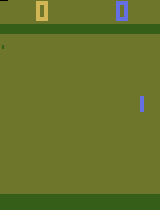

In [ ]:
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3.common import atari_wrappers
import ale_py

env = gym.make("PongNoFrameskip-v4", render_mode="rgb_array")

obs,_ = env.reset()

print(obs.shape)

env.render()

Unfortunately, the previous version of DQN doesn't work very well. So we need to do perform some upgrades.

- On one hand, we need to explore the environment (using random actions); on the other, we want to use the knowledge gained by the $Q$-function; this is the famous "exploration versus exploitation dilemma".  We will resolve this dilemma by introducing a parameter $\epsilon\in[0,1]$, that will decrease with the number of iterations, and will be used to decide, with probability $\epsilon$, if the agent will take a random action or will choose the action prescribed by $Q$.

- We will also introduce a **replay buffer**. This will store a "large" number of transitions $(s, a, r, s')$ that will be used to construct training data batches to update the parameters of $Q$ using gradient descent.

- Finally, using $Q$ itself to generate the targets for the loss will make the training very unstable. To circumvent this problem, we will introduce another DQN $\hat Q$, called the **target network**, that is periodically synchronized with the main $Q$ network, but otherwise remains unchanged for a given number of iterations.   



Upgraded DQN algorithm:  

1. Initialize parameters for $Q(s,a)$ and $\hat Q(s,a)$,$\;\epsilon \leftarrow 1.0$, and empty the replay buffer.

2. With probability $\epsilon$, select a random action $a$; otherwise, $a = \text{argmax}_a Q(s, a)$.

3. Execute action $a$ in an emulator and observe the reward, $r$, and the next state, $s'$.

4. Store the transition $(s, a, r, s')$ in the replay buffer.

5. Sample a random mini-batch of transitions from the replay buffer.

6. For every transition in the buffer, calculate the target:

$$
y =
\left\{
\begin{array}{l}
 r  \quad,\text{ if episode ended}\;, \\
 r + \gamma \max_{a'} Q(s' ,a') \quad, \text{ otherwise} \;.
\end{array}
\right.
$$

7. Calculatetheloss: ${\cal L}=(Q(s,a)-y)^2.

8. Update $Q(s, a)$ using an appropriate gradient descent based algorithm, to minimize the loss with respect to the $Q$ model parameters.

9. Repeat from step 2 until convergence (in the sense described before) is achieved.


We will now present the Lapan's implementation of this algorithm, as exposed in chapter 6 of his book; see also
https://github.com/PacktPublishing/Deep-Reinforcement-Learning-Hands-On-Third-Edition.

Note that Lapan uses PyTorch to implement the DQNs. It is a quite instructive exercise to translate the code to tensorflow/keras.  

# **Wrappers:** For efficiency and conceptual reasons, we need to preprocess the environment. For instance:

- We can reduce the game frames by considering only a monochromatic version of them and a lower resolution. This is "hidden" in the *atari_wrappers.AtariWrapper* class. After applying this, our images will have a shape of $(84,84,1)$; recall that originally they had a shape equal to $(210,160,3)$. Note that this class takes care of a lot of more relevant preprocessing details (see Chapter 6 of Lapan's book for more details).   

- This isn't the way PyTorch is designed to receive information; it expects the form (channels, height, width). The ImageToPyTorch wrapper, presented below, takes care of this.

- The agent won't be able to learn how to play Pong if we only provide still images of the game. To learn how to play Pong, we need to learn about dynamics. So we need to pack a given number (n_steps) of consecutive images into a "small video" with n_steps frames. This is taken care of by the BufferWrapper (see below).

Here is the code for the wrappers.  

In [ ]:
class ImageToPyTorch(gym.ObservationWrapper):
    def __init__(self, env):
        super(ImageToPyTorch, self).__init__(env)
        obs = self.observation_space
        assert isinstance(obs, gym.spaces.Box)
        assert len(obs.shape) == 3
        new_shape = (obs.shape[-1], obs.shape[0], obs.shape[1])
        self.observation_space = gym.spaces.Box(
            low=obs.low.min(), high=obs.high.max(),
            shape=new_shape, dtype=obs.dtype)

    def observation(self, observation):
        return np.moveaxis(observation, 2, 0)


class BufferWrapper(gym.ObservationWrapper):
    def __init__(self, env, n_steps):
        super(BufferWrapper, self).__init__(env)
        obs = env.observation_space
        assert isinstance(obs, spaces.Box)
        new_obs = gym.spaces.Box(
            obs.low.repeat(n_steps, axis=0), obs.high.repeat(n_steps, axis=0),
            dtype=obs.dtype)
        self.observation_space = new_obs
        self.buffer = collections.deque(maxlen=n_steps)

    def reset(self, *, seed: tt.Optional[int] = None, options: tt.Optional[dict[str, tt.Any]] = None):
        for _ in range(self.buffer.maxlen-1):
            self.buffer.append(self.env.observation_space.low)
        obs, extra = self.env.reset()
        return self.observation(obs), extra

    def observation(self, observation: np.ndarray) -> np.ndarray:
        self.buffer.append(observation)
        return np.concatenate(self.buffer)


def make_env(env_name: str, **kwargs):
    env = gym.make(env_name, **kwargs)
    env = atari_wrappers.AtariWrapper(env, clip_reward=False, noop_max=0)
    env = ImageToPyTorch(env)
    env = BufferWrapper(env, n_steps=4)
    return env

For the DQN model, we will use a typical convolution network, with a conv base followed by a dense network. Importantly, instead of modeling $Q$ as a function of the pair $(s,a)$ that outputs the corresponding value, i.e.,

$$Q: {\cal S}\times {\cal A} \rightarrow \mathbb{R}\;,$$

where, for our environment, we have

$${\cal S}=\mathbb{R}^{84\times 84\times 4}$$

and

$${\cal A} =\{0,1,2,3,4,5\} \subset \mathbb{R}\;,$$

we will use a dual representation   

$$Q: {\cal S} \rightarrow \mathbb{R}^6\;,$$

that given the state, outputs the value for each possible action.

The PyTorch code should be, by now, self-explanatory. Notice nonetheless that it requires a bit more work, than the one needed in Keras to set dimensions of the layers.

In [ ]:
import torch
import torch.nn as nn


class DQN(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(DQN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
        )
        size = self.conv(torch.zeros(1, *input_shape)).size()[-1]
        self.fc = nn.Sequential(
            nn.Linear(size, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions)
        )

    def forward(self, x: torch.ByteTensor):
        # scale on GPU
        xx = x / 255.0
        return self.fc(self.conv(xx))

Next we define several parameters and variables and construct the class fro replay buffer.  

In [ ]:
DEFAULT_ENV_NAME = "PongNoFrameskip-v4"
MEAN_REWARD_BOUND = 19

GAMMA = 0.99
BATCH_SIZE = 32
REPLAY_SIZE = 10000
LEARNING_RATE = 1e-4
SYNC_TARGET_FRAMES = 1000
REPLAY_START_SIZE = 10000

EPSILON_DECAY_LAST_FRAME = 150000
EPSILON_START = 1.0
EPSILON_FINAL = 0.01

State = np.ndarray
Action = int
BatchTensors = tt.Tuple[
    torch.ByteTensor,           # current state
    torch.LongTensor,           # actions
    torch.Tensor,               # rewards
    torch.BoolTensor,           # done || trunc
    torch.ByteTensor            # next state
]

@dataclass
class Experience:
    state: State
    action: Action
    reward: float
    done_trunc: bool
    new_state: State


class ExperienceBuffer:
    def __init__(self, capacity: int):
        self.buffer = collections.deque(maxlen=capacity)

    def __len__(self):
        return len(self.buffer)

    def append(self, experience: Experience):
        self.buffer.append(experience)

    def sample(self, batch_size: int) -> tt.List[Experience]:
        indices = np.random.choice(len(self), batch_size, replace=False)
        return [self.buffer[idx] for idx in indices]

We now create the agent class.

In [ ]:
class Agent:
    def __init__(self, env: gym.Env, exp_buffer: ExperienceBuffer):
        self.env = env
        self.exp_buffer = exp_buffer
        self.state: tt.Optional[np.ndarray] = None
        self._reset()

    def _reset(self):
        self.state, _ = env.reset()
        self.total_reward = 0.0

    @torch.no_grad()
    def play_step(self, net: dqn_model.DQN, device: torch.device,
                  epsilon: float = 0.0) -> tt.Optional[float]:
        done_reward = None

        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            state_v = torch.as_tensor(self.state).to(device)
            state_v.unsqueeze_(0)
            q_vals_v = net(state_v)
            _, act_v = torch.max(q_vals_v, dim=1)
            action = int(act_v.item())

        # do step in the environment
        new_state, reward, is_done, is_tr, _ = self.env.step(action)
        self.total_reward += reward

        exp = Experience(
            state=self.state, action=action, reward=float(reward),
            done_trunc=is_done or is_tr, new_state=new_state
        )
        self.exp_buffer.append(exp)
        self.state = new_state
        if is_done or is_tr:
            done_reward = self.total_reward
            self._reset()
        return done_reward

We will also need to transform our samples taken from the buffer into tensors that can be fed to our networks. This is achieved by this simple function.

In [ ]:
def batch_to_tensors(batch: tt.List[Experience], device: torch.device) -> BatchTensors:
    states, actions, rewards, dones, new_state = [], [], [], [], []
    for e in batch:
        states.append(e.state)
        actions.append(e.action)
        rewards.append(e.reward)
        dones.append(e.done_trunc)
        new_state.append(e.new_state)
    states_t = torch.as_tensor(np.asarray(states))
    actions_t = torch.LongTensor(actions)
    rewards_t = torch.FloatTensor(rewards)
    dones_t = torch.BoolTensor(dones)
    new_states_t = torch.as_tensor(np.asarray(new_state))
    return states_t.to(device), actions_t.to(device), rewards_t.to(device), \
           dones_t.to(device),  new_states_t.to(device)

A not-so-easy piece of code, even being quite small, is the one to compute the loss.

In [ ]:
def calc_loss(batch: tt.List[Experience], net: dqn_model.DQN, tgt_net: dqn_model.DQN,
              device: torch.device) -> torch.Tensor:
    states_t, actions_t, rewards_t, dones_t, new_states_t = batch_to_tensors(batch, device)

    state_action_values = net(states_t).gather(
        1, actions_t.unsqueeze(-1)
    ).squeeze(-1)
    with torch.no_grad():
        next_state_values = tgt_net(new_states_t).max(1)[0]
        next_state_values[dones_t] = 0.0
        next_state_values = next_state_values.detach()

    expected_state_action_values = next_state_values * GAMMA + rewards_t
    return nn.MSELoss()(state_action_values, expected_state_action_values)

Finally, we have the code for the training loop. Note that this training procedure is quite expensive it will be unfeaseble without the access to a GPU.  

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument("--dev", default="cpu", help="Device name, default=cpu")
parser.add_argument("--env", default=DEFAULT_ENV_NAME,
                    help="Name of the environment, default=" + DEFAULT_ENV_NAME)
args = parser.parse_args()
device = torch.device(args.dev)

env = wrappers.make_env(args.env)
net = dqn_model.DQN(env.observation_space.shape, env.action_space.n).to(device)
tgt_net = dqn_model.DQN(env.observation_space.shape, env.action_space.n).to(device)
writer = SummaryWriter(comment="-" + args.env)
print(net)

buffer = ExperienceBuffer(REPLAY_SIZE)
agent = Agent(env, buffer)
epsilon = EPSILON_START

optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)
total_rewards = []
frame_idx = 0
ts_frame = 0
ts = time.time()
best_m_reward = None


while True:
    frame_idx += 1
    epsilon = max(EPSILON_FINAL, EPSILON_START - frame_idx / EPSILON_DECAY_LAST_FRAME)

    reward = agent.play_step(net, device, epsilon)
    if reward is not None:
        total_rewards.append(reward)
        speed = (frame_idx - ts_frame) / (time.time() - ts)
        ts_frame = frame_idx
        ts = time.time()
        m_reward = np.mean(total_rewards[-100:])
        print(f"{frame_idx}: done {len(total_rewards)} games, reward {m_reward:.3f}, "
              f"eps {epsilon:.2f}, speed {speed:.2f} f/s")
        writer.add_scalar("epsilon", epsilon, frame_idx)
        writer.add_scalar("speed", speed, frame_idx)
        writer.add_scalar("reward_100", m_reward, frame_idx)
        writer.add_scalar("reward", reward, frame_idx)
        if best_m_reward is None or best_m_reward < m_reward:
            torch.save(net.state_dict(), args.env + "-best_%.0f.dat" % m_reward)
            if best_m_reward is not None:
                print(f"Best reward updated {best_m_reward:.3f} -> {m_reward:.3f}")
            best_m_reward = m_reward
        if m_reward > MEAN_REWARD_BOUND:
            print("Solved in %d frames!" % frame_idx)
            break
    if len(buffer) < REPLAY_START_SIZE:
        continue
    if frame_idx % SYNC_TARGET_FRAMES == 0:
        tgt_net.load_state_dict(net.state_dict())

    optimizer.zero_grad()
    batch = buffer.sample(BATCH_SIZE)
    loss_t = calc_loss(batch, net, tgt_net, device)
    loss_t.backward()
    optimizer.step()
    if frame_idx % 10 == 0:
        print(f"training in frame {frame_idx}, Loss = {loss_t:.4f}")
writer.close()


The evolution of our agent's ability to play pong is recorded in the following collection of videos
https://www.youtube.com/playlist?list=PLMVwuZENsfJklt4vCltrWq0KV9aEZ3ylu

# Worksheet #9: Rewrite Laplan's code using TensorFlow and Keras.